In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [2]:
dataset = pd.read_csv('kindey stone urine analysis (2).csv')

In [3]:
dataset.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


In [4]:
dataset.describe()

,gravity,ph,osmo,cond,urea,calc,target
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,1.018114,6.028481,612.848101,20.813924,266.405063,4.138987,0.430380
std,0.007239,0.724307,237.514755,7.938994,131.254550,3.260051,0.498293
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.012000,5.530000,413.000000,14.150000,160.000000,1.460000,0.000000
50%,1.018000,5.940000,594.000000,21.400000,260.000000,3.160000,0.000000
75%,1.023500,6.385000,792.000000,26.550000,372.000000,5.930000,1.000000
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [5]:
dataset.shape

(79, 7)

In [6]:
dataset.columns

Index(['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')

In [7]:
dataset.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
74    False
75    False
76    False
77    False
78    False
Length: 79, dtype: bool

In [8]:
dataset.duplicated().sum()

0

In [9]:
dataset.isna().sum()

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

<AxesSubplot:xlabel='gravity'>

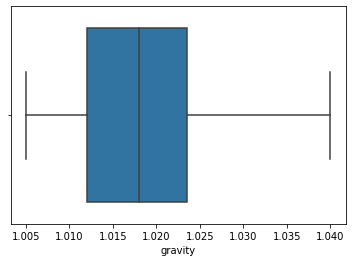

In [10]:
sns.boxplot(data = dataset, x='gravity')

<AxesSubplot:xlabel='ph'>

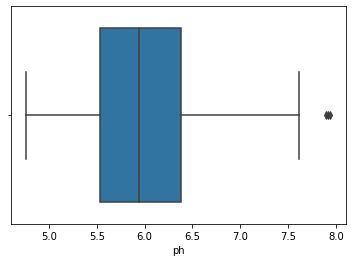

In [11]:
sns.boxplot(data = dataset, x='ph')

<AxesSubplot:xlabel='osmo'>

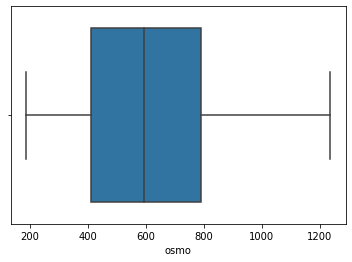

In [12]:
sns.boxplot(data = dataset, x='osmo')

<AxesSubplot:xlabel='cond'>

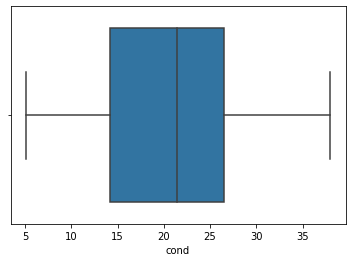

In [13]:
sns.boxplot(data = dataset, x='cond')

<AxesSubplot:xlabel='urea'>

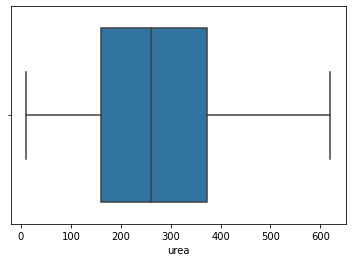

In [14]:
sns.boxplot(data = dataset, x='urea')

<AxesSubplot:xlabel='calc'>

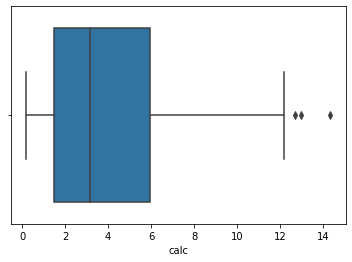

In [15]:
sns.boxplot(data = dataset, x='calc')

In [16]:
import seaborn as sns

<AxesSubplot:>

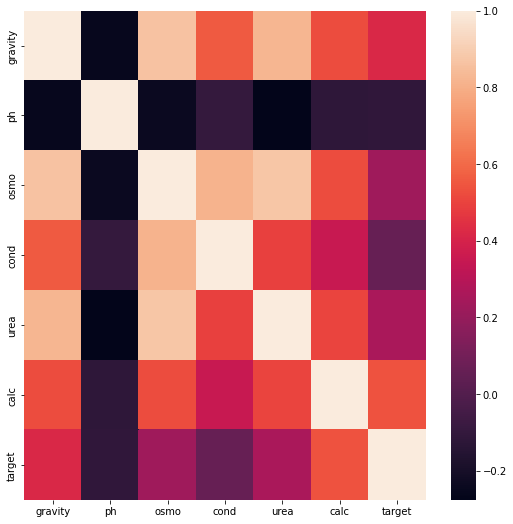

In [17]:
plt.figure(figsize=(9,9))
sns.heatmap(dataset.corr())

In [18]:
X = dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state=0)
log_classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [21]:
log_y_pred = log_classifier.predict(x_test)

<AxesSubplot:>

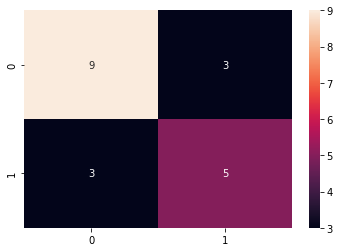

In [22]:
from sklearn.metrics import confusion_matrix
log_cm = confusion_matrix(y_test, log_y_pred)
sns.heatmap(log_cm, annot = True)

In [23]:
from sklearn.metrics import accuracy_score, precision_score
print(accuracy_score(y_test,log_y_pred))
print(precision_score(y_test,log_y_pred))

0.7
0.625


In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=21,metric='minkowski')
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [25]:
knn_y_pred = knn_classifier.predict(x_test)

<AxesSubplot:>

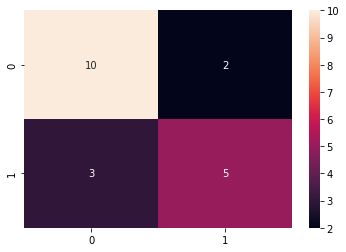

In [26]:
from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(y_test, knn_y_pred)
sns.heatmap(knn_cm, annot = True)

In [27]:
from sklearn.metrics import accuracy_score, precision_score
print(accuracy_score(y_test,knn_y_pred))
print(precision_score(y_test,knn_y_pred))

0.75
0.7142857142857143


In [28]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'rbf',random_state=0)
svm_classifier.fit(x_train, y_train)

SVC(random_state=0)

In [29]:
svm_y_pred = svm_classifier.predict(x_test)

<AxesSubplot:>

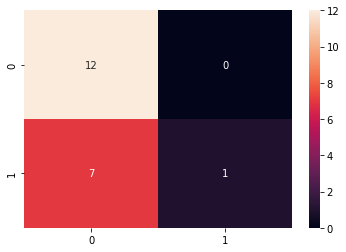

In [30]:
from sklearn.metrics import confusion_matrix
svm_cm = confusion_matrix(y_test, svm_y_pred)
sns.heatmap(svm_cm, annot = True)

In [31]:
from sklearn.metrics import accuracy_score, precision_score
print(accuracy_score(y_test,svm_y_pred))
print(precision_score(y_test,svm_y_pred))

0.65
1.0


In [32]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [33]:
# Initialising the ANN
classifier=Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units= 400, activation='relu', input_dim=6)) 
classifier.add(Dropout (rate=0.1))

# Adding Second hidden layer
classifier.add(Dense (units = 400, activation='relu'))
classifier.add(Dropout (rate=0.1))

# Output layer
classifier.add(Dense (units = 1, activation='sigmoid'))

In [34]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
classifier.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
2/2 [==============================] - 2s 19ms/step - loss: 19.7547 - accuracy: 0.5254
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 26.5862 - accuracy: 0.4576
Epoch 3/100
2/2 [==============================] - 0s 18ms/step - loss: 14.7997 - accuracy: 0.5593
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 11.2000 - accuracy: 0.5932
Epoch 5/100
2/2 [==============================] - 0s 14ms/step - loss: 9.5047 - accuracy: 0.4068
Epoch 6/100
2/2 [==============================] - 0s 14ms/step - loss: 7.7539 - accuracy: 0.5085
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 5.2145 - accuracy: 0.5424
Epoch 8/100
2/2 [==============================] - 0s 16ms/step - loss: 7.3017 - accuracy: 0.5254
Epoch 9/100
2/2 [==============================] - 0s 13ms/step - loss: 6.5131 - accuracy: 0.4746
Epoch 10/100
2/2 [==============================] - 0s 13ms/step - loss: 5.6866 - accuracy: 0.4746
Epoch 11/100
2/

2/2 [==============================] - 0s 11ms/step - loss: 0.8198 - accuracy: 0.6610
Epoch 84/100
2/2 [==============================] - 0s 13ms/step - loss: 1.2584 - accuracy: 0.6610
Epoch 85/100
2/2 [==============================] - 0s 12ms/step - loss: 1.4518 - accuracy: 0.5254
Epoch 86/100
2/2 [==============================] - 0s 11ms/step - loss: 0.8902 - accuracy: 0.6271
Epoch 87/100
2/2 [==============================] - 0s 12ms/step - loss: 1.1323 - accuracy: 0.5593
Epoch 88/100
2/2 [==============================] - 0s 13ms/step - loss: 1.0600 - accuracy: 0.5763
Epoch 89/100
2/2 [==============================] - 0s 12ms/step - loss: 1.6712 - accuracy: 0.4407
Epoch 90/100
2/2 [==============================] - 0s 10ms/step - loss: 1.2589 - accuracy: 0.5763
Epoch 91/100
2/2 [==============================] - 0s 12ms/step - loss: 1.0471 - accuracy: 0.6441
Epoch 92/100
2/2 [==============================] - 0s 13ms/step - loss: 1.2469 - accuracy: 0.6102
Epoch 93/100
2/2 [=====

In [36]:
ann_y_pred = classifier.predict(x_test)

1/1 [==============================] - 0s 152ms/step


In [37]:
ann_y_pred[0]

array([0.77068806], dtype=float32)

In [38]:
ann_y_pred=ann_y_pred>=0.5

<AxesSubplot:>

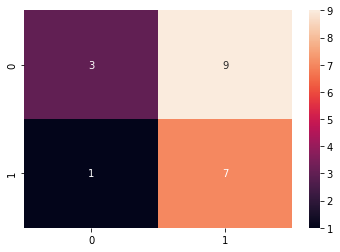

In [39]:
from sklearn.metrics import confusion_matrix
ann_cm = confusion_matrix(y_test, ann_y_pred)
sns.heatmap(ann_cm, annot = True)

In [40]:
from sklearn.metrics import accuracy_score, precision_score
print(accuracy_score(y_test,ann_y_pred))
print(precision_score(y_test,ann_y_pred))

0.5
0.4375


In [45]:
import pickle
pickle.dump(knn_classifier,open('Urinal kidney disease.pkl', 'wb'))